In [104]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

In [105]:
x = tf.range([5], dtype=float)
y = tf.sin(x)**2
print(x)
print(y,"\n")

a = tf.random.uniform([])
b = tf.random.uniform([])
c = tf.random.uniform([])
d = tf.random.uniform([])
print(a)
print(b)
print(c)
print(d)
print()
print("GPU 사용이 가능한가 : "),
print(tf.test.is_gpu_available())

print("텐서가 GPU #0에 있는가 : "),
print(x.device.endswith('GPU:0'))

tf.Tensor([0. 1. 2. 3. 4.], shape=(5,), dtype=float32)
tf.Tensor([0.         0.70807344 0.82682186 0.01991485 0.57275003], shape=(5,), dtype=float32) 

tf.Tensor(0.8281225, shape=(), dtype=float32)
tf.Tensor(0.067555785, shape=(), dtype=float32)
tf.Tensor(0.40174353, shape=(), dtype=float32)
tf.Tensor(0.27170706, shape=(), dtype=float32)

GPU 사용이 가능한가 : 
True
텐서가 GPU #0에 있는가 : 
True


In [106]:
lr = 0.0001
epochs = 10000

In [107]:
tf.debugging.set_log_device_placement(True)

with tf.device("CPU:0"):
    start = time.time()
    print("start : ",start)
    for epoch in range(epochs):
        y_pred = a + b*x + c*x**2

        loss = tf.reduce_mean((y_pred-y)**2)

        y_grad = 2.0 * (y_pred-y)
        a_weight = tf.reduce_sum(y_grad)
        b_weight = tf.reduce_sum(y_grad*x)
        c_weight = tf.reduce_sum(y_grad*x**2)
        d_weight = tf.reduce_sum(y_grad*x**3)

        a -= a_weight * lr
        b -= b_weight * lr
        c -= c_weight * lr
        d -= d_weight * lr
        if epoch%500 == 0:
            print("{}번째 수행 결과\ny : {}\n y_pred : {}\n loss : {}\n".format(epoch, y, y_pred, loss))  
    print("time.time() : ",time.time()) 
    print("start : ",start)
    print(time.time()-start)     

start :  1623128370.0134974
0번째 수행 결과
y : [0.         0.70807344 0.82682186 0.01991485 0.57275003]
 y_pred : [0.8281225 1.2974218 2.570208  4.6464815 7.5262423]
 loss : 14.765737533569336

500번째 수행 결과
y : [0.         0.70807344 0.82682186 0.01991485 0.57275003]
 y_pred : [0.7160203  0.6502205  0.57175606 0.48062682 0.37683287]
 loss : 0.16634592413902283

1000번째 수행 결과
y : [0.         0.70807344 0.82682186 0.01991485 0.57275003]
 y_pred : [0.65665615 0.5968075  0.5339036  0.46794435 0.39892992]
 loss : 0.1520644724369049

1500번째 수행 결과
y : [0.         0.70807344 0.82682186 0.01991485 0.57275003]
 y_pred : [0.60937595 0.5590641  0.5095426  0.46081144 0.41287062]
 loss : 0.14283204078674316

2000번째 수행 결과
y : [0.         0.70807344 0.82682186 0.01991485 0.57275003]
 y_pred : [0.5709065  0.5323931  0.4945931  0.45750657 0.42113343]
 loss : 0.13632957637310028

2500번째 수행 결과
y : [0.         0.70807344 0.82682186 0.01991485 0.57275003]
 y_pred : [0.53892046 0.51354545 0.48617798 0.45681795 0.42

[<tf.Tensor: shape=(), dtype=float32, numpy=0.3170381>, <tf.Tensor: shape=(), dtype=float32, numpy=1.0263095>, <tf.Tensor: shape=(), dtype=float32, numpy=4.994589>, <tf.Tensor: shape=(), dtype=float32, numpy=15.569561>, <tf.Tensor: shape=(), dtype=float32, numpy=36.09891>, <tf.Tensor: shape=(), dtype=float32, numpy=69.93033>, <tf.Tensor: shape=(), dtype=float32, numpy=120.41149>, <tf.Tensor: shape=(), dtype=float32, numpy=190.89009>, <tf.Tensor: shape=(), dtype=float32, numpy=284.7138>, <tf.Tensor: shape=(), dtype=float32, numpy=405.23035>, <tf.Tensor: shape=(), dtype=float32, numpy=555.78735>, <tf.Tensor: shape=(), dtype=float32, numpy=739.73254>, <tf.Tensor: shape=(), dtype=float32, numpy=960.41364>, <tf.Tensor: shape=(), dtype=float32, numpy=1221.1782>, <tf.Tensor: shape=(), dtype=float32, numpy=1525.374>, <tf.Tensor: shape=(), dtype=float32, numpy=1876.3489>, <tf.Tensor: shape=(), dtype=float32, numpy=2277.4502>, <tf.Tensor: shape=(), dtype=float32, numpy=2732.026>, <tf.Tensor: sha

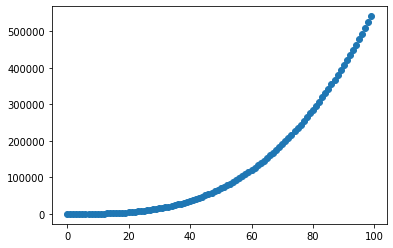

In [111]:
test_num = 100
result_y = [0 for i in range(test_num)]

for x in range(test_num):
    y_pred_test = a + b*x + c*x**2 + d*x**3
    result_y[x] = y_pred_test

print(result_y)
plt.scatter(range(test_num), result_y)